<a href="https://colab.research.google.com/github/MaryamCodeHub/-Global-Video-Game-Market-Analysis/blob/main/Global_Video_Game_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files

uploaded = files.upload()   # Choose your ZIP file from your computer



Saving archive.zip to archive.zip


In [3]:
import zipfile
import os

# Replace with your uploaded zip filename
zip_path = "archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("my_dataset")  # unzip into folder called my_dataset

# Check extracted files
os.listdir("my_dataset")


['Video_Games_Sales_as_at_22_Dec_2016.csv']

In [4]:
df = pd.read_csv("my_dataset/Video_Games_Sales_as_at_22_Dec_2016.csv")


# **Initial** **Data** **Exploration**




In [5]:
print(f"Dataset shape: {df.shape}")


Dataset shape: (16719, 16)


In [6]:
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [7]:
print("\n🔍 Dataset info:")
print(df.info())


🔍 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.

In [8]:
print("\n🎯 Key statistics:")
print(df.describe())


🎯 Key statistics:
       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.0

In [9]:
print("\n📈 Missing values summary:")
print(df.isnull().sum())


📈 Missing values summary:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


# **Data Cleaning**

In [10]:
df_clean = df.copy()

In [11]:
print("Missing values BEFORE cleaning:")
print(df_clean.isnull().sum())

Missing values BEFORE cleaning:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [12]:
print(f"\nOriginal dataset shape: {df_clean.shape}")


Original dataset shape: (16719, 16)


In [13]:
df_clean = df_clean.dropna(subset=['Year_of_Release'])

**STRATEGY 1:** Handle CRITICAL columns for ALL analysis


In [14]:
# 1. Handle the few missing Names and Genres - just drop them (insignificant amount)
df_clean = df_clean.dropna(subset=['Name', 'Genre'])

# 2. Handle missing Year_of_Release - drop these rows (we need this for time analysis)
df_clean = df_clean.dropna(subset=['Year_of_Release'])
df_clean['Year_of_Release'] = df_clean['Year_of_Release'].astype(int)  # Convert to integer

# 3. Handle missing Publisher - drop these rows (needed for publisher analysis)
df_clean = df_clean.dropna(subset=['Publisher'])

**STRATEGY 2:** Handle the MASSIVELY missing columns


In [15]:
# 4. Clean User_Score: convert 'tbd' to NaN and then to float
df_clean['User_Score'] = pd.to_numeric(df_clean['User_Score'], errors='coerce')

# 5. Create a FLAG for games that have complete review data
df_clean['has_review_data'] = df_clean['Critic_Score'].notnull() & df_clean['User_Score'].notnull()


In [16]:
print("\nMissing values AFTER cleaning critical columns:")
print(df_clean.isnull().sum())


Missing values AFTER cleaning critical columns:
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
has_review_data       0
dtype: int64


In [17]:
print(f"\nDataset shape after critical cleaning: {df_clean.shape}")


Dataset shape after critical cleaning: (16416, 17)


In [18]:
print(f"Number of games with complete review data: {df_clean['has_review_data'].sum()}")

Number of games with complete review data: 6893


# **1. MARKET OVERVIEW & INDUSTRY TRENDS**

### 1.1 Overall Market Summary

In [20]:
total_sales = df_clean['Global_Sales'].sum()
avg_sales = df_clean['Global_Sales'].mean()
total_games = len(df_clean)

print(f"📈 Total Global Sales: ${total_sales:.0f} million")
print(f"🎮 Total Games Analyzed: {total_games:,}")
print(f"💰 Average Sales Per Game: ${avg_sales:.2f} million")

📈 Total Global Sales: $8811 million
🎮 Total Games Analyzed: 16,416
💰 Average Sales Per Game: $0.54 million


### 1.2 Sales Distribution Histogram

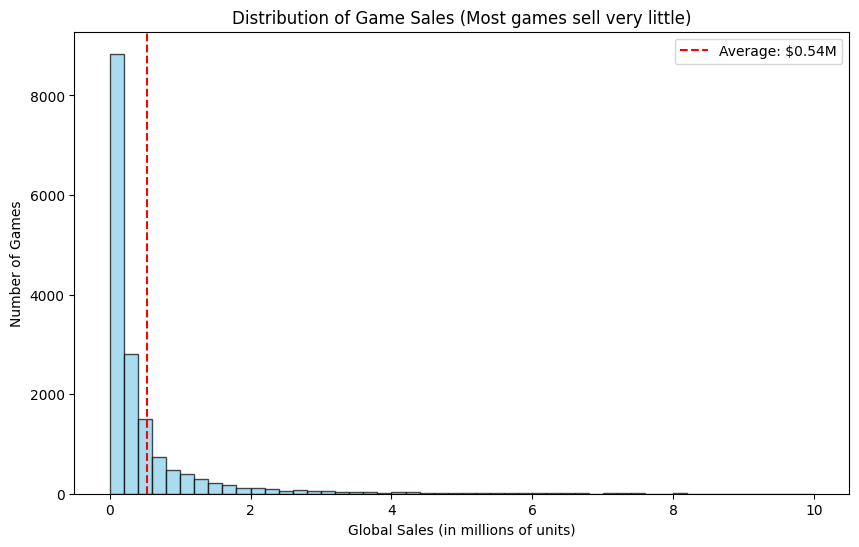

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Global_Sales'], bins=50, range=(0, 10), alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Sales (Most games sell very little)')
plt.xlabel('Global Sales (in millions of units)')
plt.ylabel('Number of Games')
plt.axvline(avg_sales, color='red', linestyle='--', label=f'Average: ${avg_sales:.2f}M')
plt.legend()
plt.show()

### 1.3 Games Released Over Time

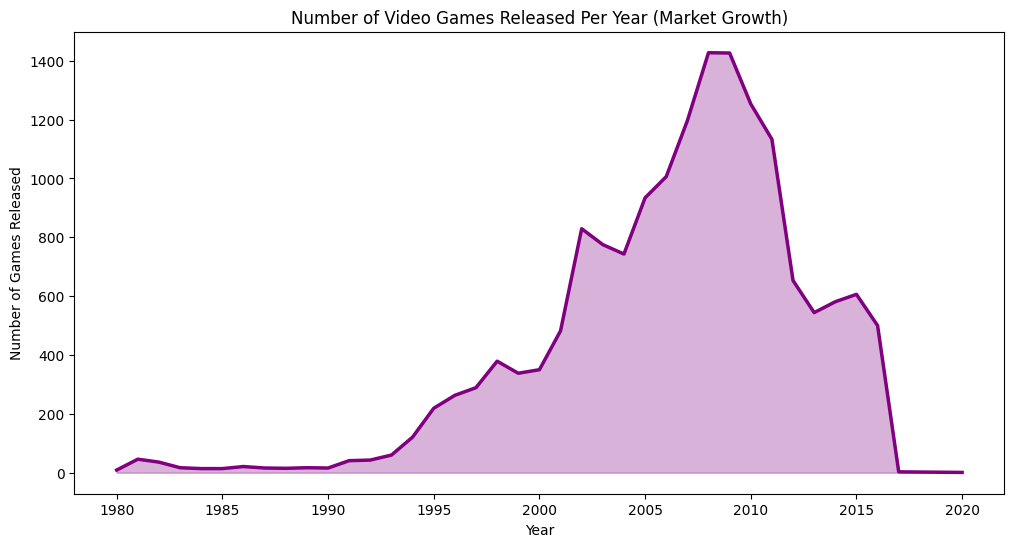

In [22]:
games_per_year = df_clean.groupby('Year_of_Release').size()
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='line', color='purple', linewidth=2.5)
plt.title('Number of Video Games Released Per Year (Market Growth)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.fill_between(games_per_year.index, games_per_year.values, alpha=0.3, color='purple')
plt.show()



### 1.4 Genre Trends Over Time

<Figure size 1400x800 with 0 Axes>

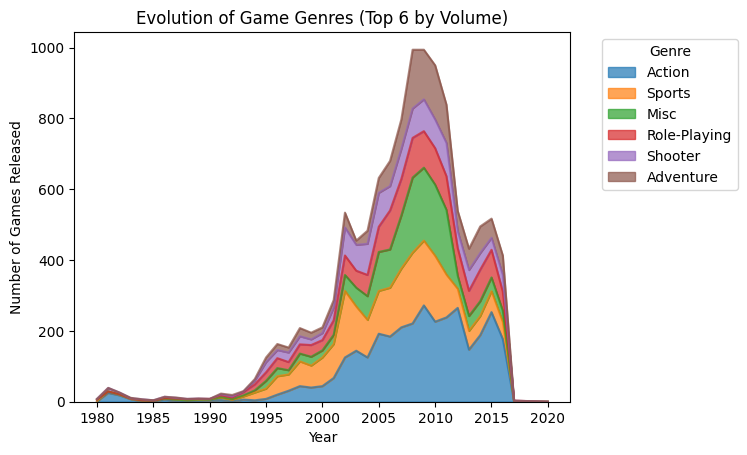

In [23]:
genre_trends = df_clean.pivot_table(index='Year_of_Release', columns='Genre', values='Global_Sales', aggfunc='count', fill_value=0)
# Get top 6 genres for cleaner visualization
top_genres = genre_trends.sum().nlargest(6).index
genre_trends_top = genre_trends[top_genres]

plt.figure(figsize=(14, 8))
genre_trends_top.plot(kind='area', alpha=0.7)
plt.title('Evolution of Game Genres (Top 6 by Volume)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **2. QUALITY vs. SUCCESS ANALYSIS**

### 2.1 Correlation: Critic Score vs Sales

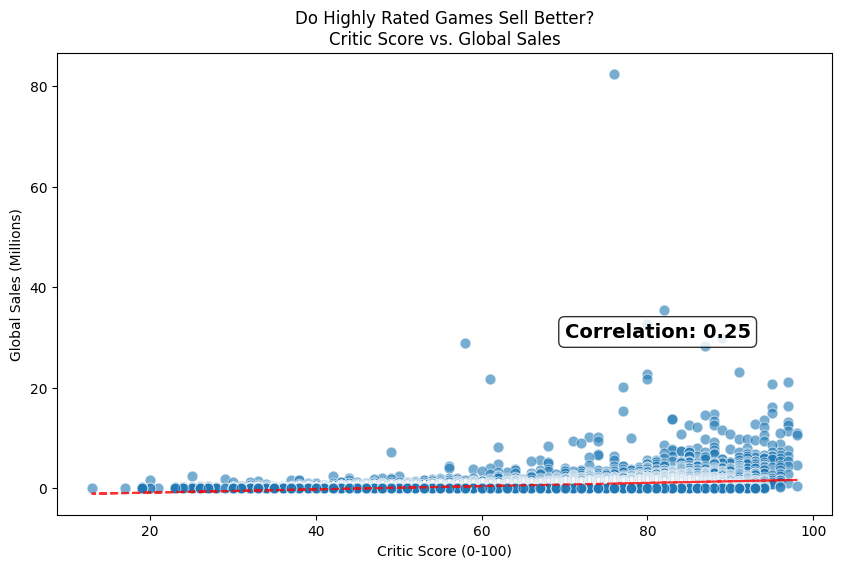

🔍 Correlation between Critic Score and Sales: 0.25


In [25]:
df_reviews = df_clean.dropna(subset=['Critic_Score', 'Global_Sales'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df_reviews, alpha=0.6, s=60)
plt.title('Do Highly Rated Games Sell Better?\nCritic Score vs. Global Sales')
plt.xlabel('Critic Score (0-100)')
plt.ylabel('Global Sales (Millions)')

# Calculate correlation and add to plot
correlation = df_reviews['Critic_Score'].corr(df_reviews['Global_Sales'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(70, 30), fontsize=14, weight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Add trendline
z = np.polyfit(df_reviews['Critic_Score'], df_reviews['Global_Sales'], 1)
p = np.poly1d(z)
plt.plot(df_reviews['Critic_Score'], p(df_reviews['Critic_Score']), "r--", alpha=0.8)

plt.show()

print(f"🔍 Correlation between Critic Score and Sales: {correlation:.2f}")

### 2.2 Critics vs Users

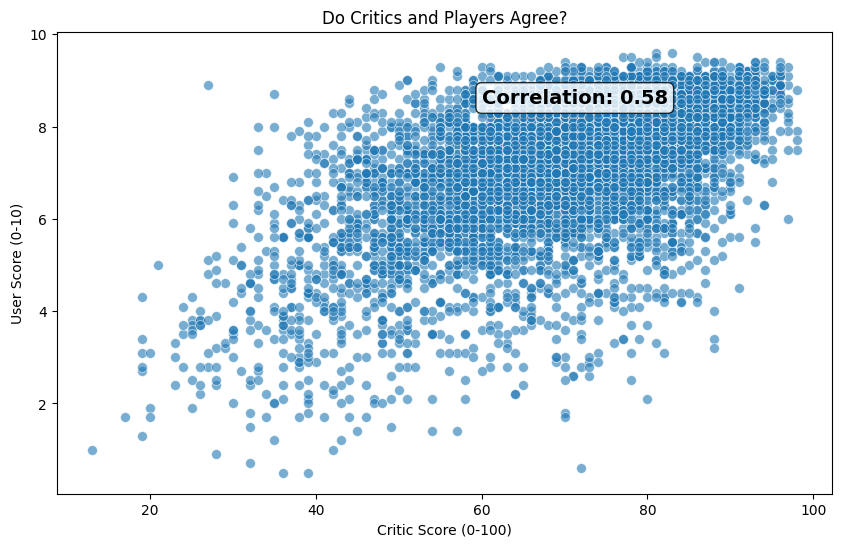


🎯 Games with Biggest Critic-Player Disagreement:
                          Name  Critic_Score  User_Score  score_difference
    Thrillville: Off the Rails          72.0         0.6               6.6
     Shrek Swamp Kart Speedway          27.0         8.9               6.2
           Company of Heroes 2          80.0         2.1               5.9
Call of Duty: Modern Warfare 3          88.0         3.2               5.6
Call of Duty: Modern Warfare 3          88.0         3.4               5.4


/tmp/ipython-input-333647447.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['score_difference'] = abs(df_reviews['Critic_Score']/10 - df_reviews['User_Score'])


In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='User_Score', data=df_reviews, alpha=0.6, s=50)
plt.title('Do Critics and Players Agree?')
plt.xlabel('Critic Score (0-100)')
plt.ylabel('User Score (0-10)')

# Calculate correlation
critic_user_corr = df_reviews['Critic_Score'].corr(df_reviews['User_Score'])
plt.annotate(f'Correlation: {critic_user_corr:.2f}', xy=(60, 8.5), fontsize=14, weight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.show()

# Find biggest disagreements
df_reviews['score_difference'] = abs(df_reviews['Critic_Score']/10 - df_reviews['User_Score'])
biggest_disagreements = df_reviews.nlargest(5, 'score_difference')[['Name', 'Critic_Score', 'User_Score', 'score_difference']]
print("\n🎯 Games with Biggest Critic-Player Disagreement:")
print(biggest_disagreements.to_string(index=False))


# **3. COMPANY & PLATFORM ANALYSIS**

### 3.1 Top Publishers by Sales

/tmp/ipython-input-4079659302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y=top_publishers.index, data=top_publishers, palette='viridis')


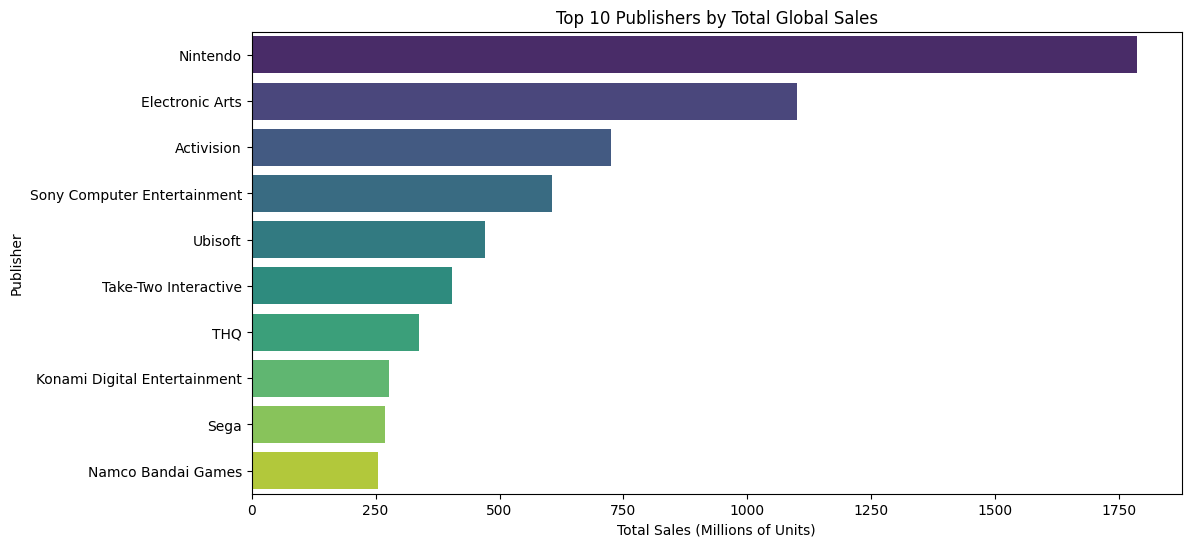

In [27]:
top_publishers = df_clean.groupby('Publisher').agg(
    total_sales=('Global_Sales', 'sum'),
    game_count=('Name', 'count')
).nlargest(10, 'total_sales')

plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y=top_publishers.index, data=top_publishers, palette='viridis')
plt.title('Top 10 Publishers by Total Global Sales')
plt.xlabel('Total Sales (Millions of Units)')
plt.ylabel('Publisher')
plt.show()

### 3.2 Quantity vs Quality for Publishers

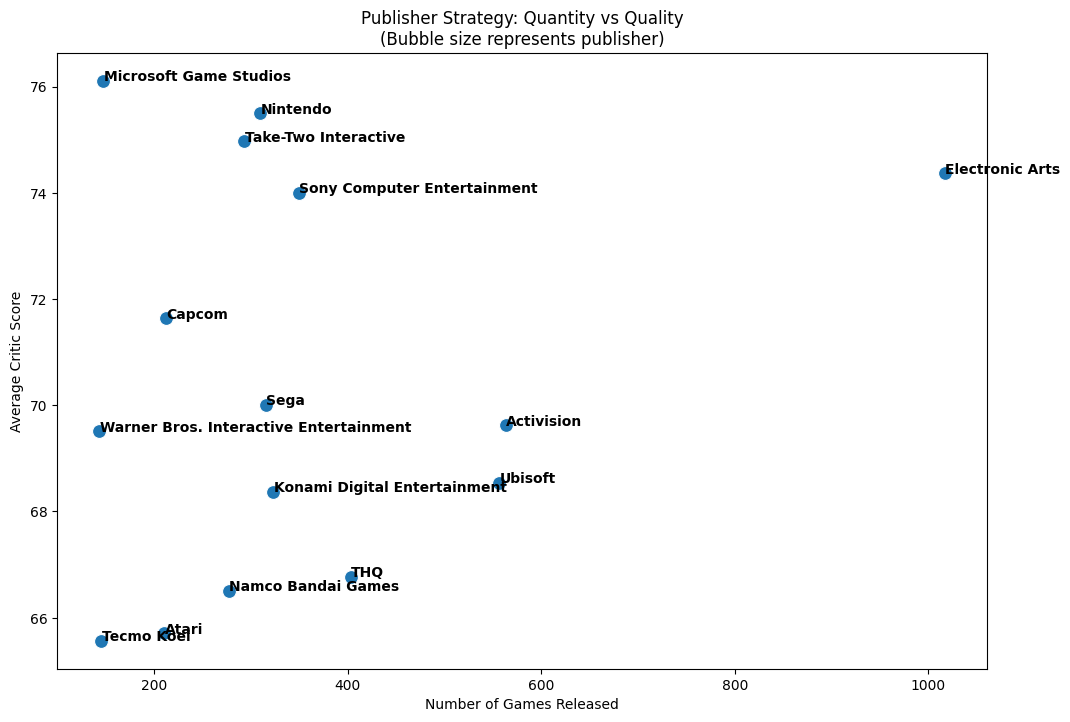

In [28]:
publisher_stats = df_reviews.groupby('Publisher').agg(
    avg_critic_score=('Critic_Score', 'mean'),
    game_count=('Name', 'count')
).sort_values('game_count', ascending=False).head(15)  # Top 15 by volume

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='game_count', y='avg_critic_score', data=publisher_stats, s=100)

# Label the points
for line in range(0, publisher_stats.shape[0]):
    scatter.text(publisher_stats.game_count.iloc[line]+0.5,
                 publisher_stats.avg_critic_score.iloc[line],
                 publisher_stats.index[line], horizontalalignment='left',
                 size='medium', color='black', weight='semibold')

plt.title('Publisher Strategy: Quantity vs Quality\n(Bubble size represents publisher)')
plt.xlabel('Number of Games Released')
plt.ylabel('Average Critic Score')
plt.show()

### 3.3 Platform Quality Comparison

/tmp/ipython-input-3020439432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_quality.values, y=platform_quality.index, palette='rocket')


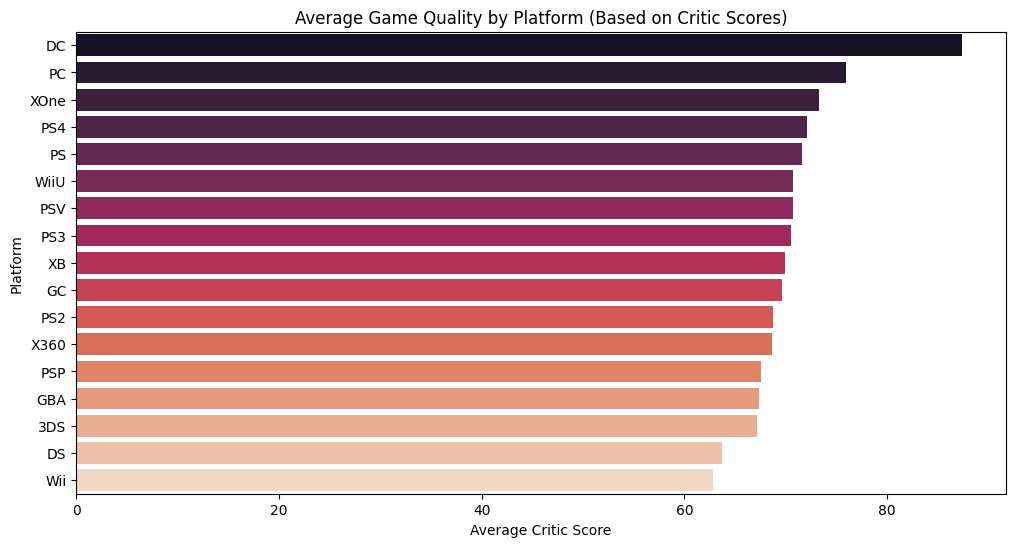

In [29]:
platform_quality = df_reviews.groupby('Platform')['Critic_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_quality.values, y=platform_quality.index, palette='rocket')
plt.title('Average Game Quality by Platform (Based on Critic Scores)')
plt.xlabel('Average Critic Score')
plt.ylabel('Platform')
plt.show()

# **TOP PERFORMERS**

### Top 10 Best Selling Games

In [30]:
top_games = df_clean.nlargest(10, 'Global_Sales')[['Name', 'Platform', 'Year_of_Release', 'Global_Sales', 'Critic_Score']]
print("🎮 Top 10 Best-Selling Games:")
print(top_games.to_string(index=False))

🎮 Top 10 Best-Selling Games:
                     Name Platform  Year_of_Release  Global_Sales  Critic_Score
               Wii Sports      Wii             2006         82.53          76.0
        Super Mario Bros.      NES             1985         40.24           NaN
           Mario Kart Wii      Wii             2008         35.52          82.0
        Wii Sports Resort      Wii             2009         32.77          80.0
 Pokemon Red/Pokemon Blue       GB             1996         31.37           NaN
                   Tetris       GB             1989         30.26           NaN
    New Super Mario Bros.       DS             2006         29.80          89.0
                 Wii Play      Wii             2006         28.92          58.0
New Super Mario Bros. Wii      Wii             2009         28.32          87.0
                Duck Hunt      NES             1984         28.31           NaN


### Highest Rated Games (with minimum sales threshold)

In [31]:
high_rated = df_reviews[df_reviews['Global_Sales'] > 1].nlargest(10, 'Critic_Score')[['Name', 'Platform', 'Critic_Score', 'Global_Sales']]
print("\n⭐ Highest Rated Games (Selling >1M units):")
print(high_rated.to_string(index=False))


print("ANALYSIS COMPLETE!")


⭐ Highest Rated Games (Selling >1M units):
                    Name Platform  Critic_Score  Global_Sales
     Grand Theft Auto IV     X360          98.0         11.01
     Grand Theft Auto IV      PS3          98.0         10.50
Tony Hawk's Pro Skater 2       PS          98.0          4.68
      Grand Theft Auto V      PS3          97.0         21.04
      Grand Theft Auto V     X360          97.0         16.27
    Grand Theft Auto III      PS2          97.0         13.10
      Grand Theft Auto V      PS4          97.0         12.61
      Super Mario Galaxy      Wii          97.0         11.35
    Super Mario Galaxy 2      Wii          97.0          7.51
    Halo: Combat Evolved       XB          97.0          6.43
ANALYSIS COMPLETE!
